In [1]:
from numpy.random import default_rng         #  numpy randon number generator routines
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [5]:
#-------------------- The simulator, Create BM paths using EM  --------------------
def path_sim( X0, n, dt, T, rng):
    """Simulate and return n independent paths for the Ornstein Unhelbeck with Z_n being standard normal random variables
       process dX_t = -a X_t dt + sig*dW_t.
    Arguments
    X0:  (type = float) start value of the paths, X[i,0] = X0
    n:   (type = int) the number of paths
    dt:  (type = float) time step for the simulator
    rng: an instance of a random number generator: np.random.Generator
    return: Y (type = np array))
            Y = the hitting time of all simulations
            
    Note: X = simuated paths, X[i,k] = step k of path i
          T = the maximum time 
          X[:,0] = X0[:] (copy starting points) and T[0] = 0
    """    
#      adjust dt (make it slightly smaller) to get an integer number of steps

    nT = T/dt        #  "number" of time steps, but may not be an integer
    nT = int(nT+1)   #  round up to the nearest integer, the number of time steps
    dt = T/nT        #  adjust the time step down accordingly
    
    T = np.linspace( 0., T, nT+1)             # steps of size dt between 0 and T,
                                              # including 0 and T
    X = np.zeros( ( n, (nT+1)), np.float64)   #  allocate path array
    Y = np.zeros((n), np.float64)
    for i in range(n):                        # the loop to find all hitting times in all paths
        X[i,0] = X0
        Y[i]=-5 # set the hitting time of all the unhitted paths at -5
        for k in range(nT): 
            if (X[i,k]<=0):
                Y[i]=k*dt # number of steps times the length of each time step
                break
            X[i,k+1] = X[i,k] + rng.standard_normal(1)*np.sqrt(dt) #let Z_n be standard normal
        if (i%1000==0):
            print(i) # motinor the progress
    return Y 

TypeError: path_sim() takes 5 positional arguments but 7 were given

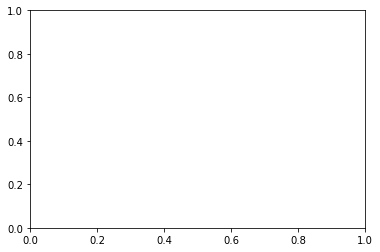

In [6]:
#------------------ The main program ---------------------------------------------------

rng = default_rng()      # instantiate a bit generator

#    Parameters for the OU process being simulated

a   = .2     # mean reversion parameter
sig = 1.     # noise amplitude
X0  = 0.     # starting point for simulated paths
dt  = .001     # simulation time step size

PathPlotFile    = "PathPics.pdf"      # filename for a picture of some paths
DensityPlotFile = "OU_densities.pdf"  # filename for a PDF plots

#   Make a picture with a few paths

n_bold = 3                 # number of bold paths
n_soft = 50                # number of softer paths
T_f    = 2.                # simulate to this "fial" time

fig, ax = plt.subplots()     # Create a figure containing a single axes.

#   generate and plot the bold paths

X,T = path_sim( X0, n_bold, dt, T_f, a, sig, rng)

bold_colors = ['blue', 'green', 'red']
for i in range(n_bold):
   ax.plot( T, X[i,:], linewidth = 1, color = bold_colors[i])
   
#   generate and plot the soft paths

X,T = path_sim( X0, n_soft, dt, T_f, a, sig, rng)
for i in range(n_soft):
   ax.plot( T, X[i,:], linewidth = .1, color = 'gray')

plt.ylim( -2.5, 2.5)
plt.xlabel("T")
plt.ylabel("X")
title_string = r"Ornstein Uhlenbeck paths, $a=${a:6.2f}, $\sigma =${sig:6.2f}"
title_string = title_string.format(a=a, sig=sig)
plt.title(title_string)
plt.grid()
plt.savefig(PathPlotFile)                                    # save in the same directory
plt.show()

0
1000
2000
3000
4000
5000
6000
7000
8000
9000


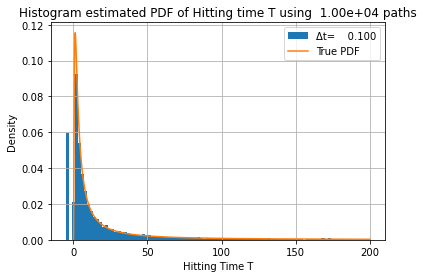

In [14]:
#------------------Main Program—PDF Visualization---------------------------------------------------
rng = default_rng()      # instantiate a bit generator

#    Parameters for the OU process being simulated

X0  = 2.     # starting point for simulated paths
dt  = .1     # simulation time step size

DensityPlotFile = "BW_densities.pdf"  # filename for a PDF plots

fig, ax = plt.subplots()     # Create a figure containing a single axes.

#histogram initializations
n_hist = 10000
n_bins = 100
X_hist = []
T2=200.

Y = path_sim( X0, n_hist, dt, T2, rng) # simulation with small Δt
hist2 = "Δt={dt3:9.3f}".format(dt3=dt2)

X_hist.append( Y )

ax.hist(X_hist, bins = n_bins, range = (-5, T2), density = True, label = [hist2])
ax.legend()
ax.grid()
plt.xlabel("Hitting Time T")
plt.ylabel("Density")
HistTitle = r'Histogram estimated PDF of Hitting time T using{n_hist:10.2e} paths'
HistTitle = HistTitle.format(n_hist=n_hist)
plt.title(HistTitle)

#x-axis ranges from dt2 and T2 with .001 steps
xspace = np.arange(dt, T2, dt)
label="True PDF"

def pdf(t,a):
    """The given PDF function
    Arguments
    t:  (type = float)the desired hitting time t
    a:  (type = float) the initial value X0
   
    return: the probability density at t
    """    
    return (a*np.exp(-a**2/(2*t))/(np.sqrt(2*np.pi*t)*t)) #given by the formula

#plot the pdf formula
ax.plot(xspace,pdf(xspace,X0),label=label)
ax.legend(loc='upper right')

plt.savefig(DensityPlotFile)
plt.show()